# Multiple Linear Regression Using Scikit Learn

The course uses graphlab which is not open source, so I will be attempting to replicate each of the HWs in scikit learn to ensure that I know the material

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
sales_train = pd.read_csv('kc_house_train_data.csv')
sales_test = pd.read_csv('kc_house_data.csv')

In [8]:
sales_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
from sklearn.linear_model import LinearRegression

In [13]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 21 columns):
id               17384 non-null int64
date             17384 non-null object
price            17384 non-null float64
bedrooms         17384 non-null int64
bathrooms        17384 non-null float64
sqft_living      17384 non-null int64
sqft_lot         17384 non-null int64
floors           17384 non-null float64
waterfront       17384 non-null int64
view             17384 non-null int64
condition        17384 non-null int64
grade            17384 non-null int64
sqft_above       17384 non-null int64
sqft_basement    17384 non-null int64
yr_built         17384 non-null int64
yr_renovated     17384 non-null int64
zipcode          17384 non-null int64
lat              17384 non-null float64
long             17384 non-null float64
sqft_living15    17384 non-null int64
sqft_lot15       17384 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.8+ MB


In [16]:
sales_train.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [36]:
X_train= sales_train[['sqft_living','bedrooms','bathrooms']]
y_train = sales_train['price']
y_test = sales_test['price']
X_test= sales_test[['sqft_living','bedrooms','bathrooms']]

# Substantiate a linear regression object

In [24]:
lm = LinearRegression()

# Fit the training data to the linear regression model

In [25]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Print the y Intercept

In [26]:
print(lm.intercept_)

87912.865815


# Print the Beta Coefficients

In [27]:
lm.coef_

array([   315.40669062, -65081.88711588,   6942.16598637])

In [35]:
Cff = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
Cff

,Coeff
bedrooms,315.406691
bathrooms,-65081.887116
sqft_living,6942.165986


# Getting Predictions

In [38]:
predictions = lm.predict(X_test)
predictions

array([ 271789.26537997,  718882.27281845,  207554.4093435 , ...,
        284670.54050078,  414673.32441803,  284670.54050078])

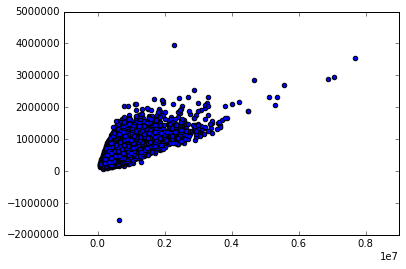

In [45]:
plt.scatter(y_test, predictions)

In [42]:
resid = (predictions-y_test)
resid_square = resid**2
RSS = resid_square.sum()
RSS

1437016492344018.5

In [51]:
from sklearn import metrics

# Mean Absolute Error (MAE)

this is a fit metric

In [52]:
metrics.mean_absolute_error(y_test, predictions)

170416.40767678965

# Mean Squared Error (MSE)

Another fit metric

In [53]:
metrics.mean_squared_error(y_test, predictions)

66488525070.282135

# Root Mean Squared Error (RMSE)

Another fit metric

In [56]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

257853.68927025679

# R-square

This shows the amount of variance the predictors explain in the target

In [57]:
metrics.r2_score(y_test, predictions)

0.50667437149965744

In [59]:
X_train_2= sales_train[['sqft_living','sqft_living15']]
y_train_2 = sales_train['price']
y_test_2 = sales_test['price']
X_test_2= sales_test[['sqft_living','sqft_living15']]

In [60]:
lm_2 = LinearRegression()

In [61]:
lm_2.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
print(lm_2.intercept_)

-100262.175159


In [65]:
lm_2.coef_

array([ 245.18871442,   65.27158522])

In [68]:
pred = -100262+245.19*(1430)+65.27*(1780)
pred

366540.3